<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">
<br>
<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Infrastructures pour l'IA</h1>
    <p style='text-align: center;'>Master Informatique 1</p>
    <p style='text-align: center;'>Anhony Larcher</p>
</div>

Dans cet exercice nous allons classifier les image sde la base de données MNIST des Support Vector Machine.

## Importez un package qui vous permette de tracer ces graphiques

In [1]:
import matplotlib.pyplot as plt

## Importez des parties de Scikit-Learn

In [2]:
# À partir du package scikit-learn, importez les modules **datasets**, **svm** et **metrics**
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split
# Importez la méthode **train_test_split** de scikit-learn, à quoi sert cette méthode?


## Téléchargez le corpus MNIST

In [3]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False
)

## Visualisez quelques exemples de MNIST
Chaque ligne de X est un vecteur qui contient les 784 valeurs des pixels d'une image 28x28 en niveaux de gris

Affichez les 4 premiers exemples de cette base de données avec leur label

In [4]:
print(X[:4,:])
print(y[:4])
X.shape


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' '1']


(70000, 784)

# Préparez vos données

Divisez le corpus MNIST en deu partitions
* **train** qui contient 75% des données 
* **dev** qui contient 25% de données



In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.95)
X_test.shape

(66500, 784)

# Visualisez la répartition des 10 classes dans les deux partitions (train et dev)

In [6]:
import pandas as pd
print(Y_train.shape)
rep_train = pd.Series(Y_train).value_counts()
rep_test = pd.Series(Y_test).value_counts()



rep_test




(3500,)


1    7463
7    6908
3    6812
9    6660
2    6654
0    6527
6    6521
8    6489
4    6474
5    5992
dtype: int64

In [7]:
X_train.shape

(3500, 784)

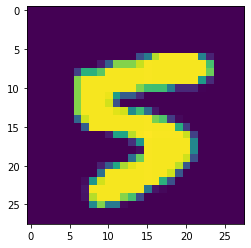

In [8]:
plt.imshow(X_train[:1,:].reshape(28,28))


Text(0, 0.5, 'quantité')

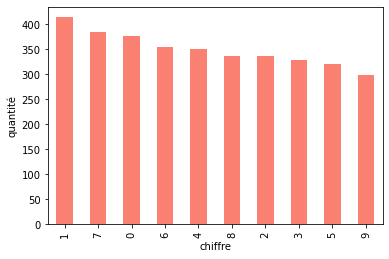

In [9]:
keys = rep_train.keys()
ax = rep_train.plot.bar(color='salmon')
ax.set_xlabel('chiffre')
ax.set_ylabel('quantité')


Text(0, 0.5, 'quantité')

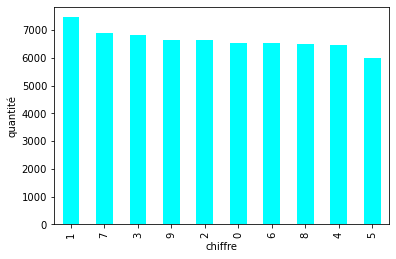

In [10]:
ax = rep_test.plot.bar(color='cyan')
ax.set_xlabel('chiffre')
ax.set_ylabel('quantité')

# Créez un classifieur SVC avec Scikit-Learn

In [11]:
# Model creation + training with train data
model = svm.SVC()
model.fit(X_train,Y_train)



SVC()

In [12]:
# generalisation on X_test
model.predict(X_test[4:5,:])

array(['8'], dtype=object)

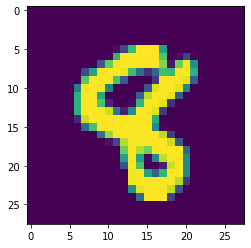

In [13]:
# look at the prediction result
plt.imshow(X_test[4:5,:].reshape(28,28))


Apprenez ce classifieur sur vos données d'apprentissage

In [14]:
# Making predictions for all sample data test
predicted = model.predict(X_test)



Prédisez les classes sur les données de développement avec ce classifieur

[[6406    1   27    7    9   17   21    7   30    2]
 [   1 7336   37   19    8   18   16    9   13    6]
 [  54   33 6251   46   75    8   53   51   75    8]
 [  13   28  140 6271    5  154   20   63   79   39]
 [   9   24   38    3 6209    3   42   19    9  118]
 [  65   35   35  112   46 5538   93    6   47   15]
 [  38   25   24    3   17   50 6355    0    9    0]
 [  13   60   71   15   75    4    2 6572   12   84]
 [  23  102   44   94   42   96   36   34 5940   78]
 [  31   34   18   83  196   45    1  243   42 5967]]


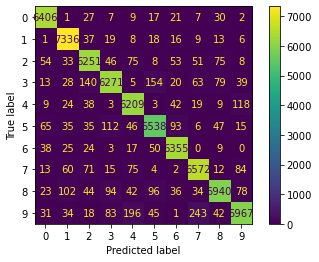

In [21]:
# Confusion_matrix to evaluate accuracy score
confusion_matrix = metrics.confusion_matrix(Y_test, predicted,labels=model.classes_) 
print(confusion_matrix)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                             display_labels=model.classes_)
disp.plot()

plt.show()

Affichez les premiers exemples de test avec leur classe prédite

In [24]:
# Accuracy score
diag = confusion_matrix.diagonal()
classes_accuracy = diag / confusion_matrix.sum(axis=1)
classes_accuracy

array([0.98146162, 0.98298271, 0.93943493, 0.92058133, 0.95906704,
       0.92423231, 0.97454378, 0.95136074, 0.91539528, 0.89594595])

# Calculez le taux d'identification sur vos donnée de DEV

Puis tracez la matrice de confusion entre les 10 classes

# Avec Scikit-Learn affichez le rapport de classification